# Python Data Analytics

<img src="images/pandas_logo.png" alt="pandas" style="width: 400px;"/>

Pandas is a numerical package used extensively in data science. You can call the install the ``pandas`` package by 
```
pip install pandas
```

Like ``numpy``, the underlying routines are written in C with improved performance


<a href="https://colab.research.google.com/github/ryan-leung/PHYS4650_Python_Tutorial/blob/master/notebooks/04-Introduction-to-Pandas.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory">
</a>


In [1]:
import pandas
pandas.__version__

'0.23.4'

In [2]:
import pandas as pd
import numpy as np

# Built-In Documentation in jupyter

For example, to display all the contents of the pandas namespace, you can type
```ipython
In [3]: pd.<TAB>
```
And to display Pandas's built-in documentation, you can use this:
```ipython
In [4]: pd?
```

# The Pandas Series Object
A Pandas Series is a one-dimensional array of indexed data.

In [3]:
data = pd.Series([1., 2., 3., 4.])
data

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [4]:
data = pd.Series([1, 2, 3, 4])
data

0    1
1    2
2    3
3    4
dtype: int64

To retrieve back the underlying numpy array, we have the values attribute 

In [5]:
data.values

array([1, 2, 3, 4])

The ``index`` is an array-like object of type ``pd.Index``.

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

Slicing and indexing just like Python standard ``list``

In [7]:
data[1]

2

In [8]:
data[1:3]

1    2
2    3
dtype: int64

# The Pandas Index

The index is useful to denote each record, the datatypes of the index can be varied. You can think of another numpy array binded to the data array.

In [9]:
data = pd.Series([1, 2, 3, 4],
                 index=['a', 'b', 'c', 'd'])
data

a    1
b    2
c    3
d    4
dtype: int64

If we supply a dictionary to the series, it will be constructed with an index.
By default, a ``Series`` will be created where the index is drawn from the sorted keys.

In [10]:
location = {
            'Berlin': (52.5170365, 13.3888599),
            'London': (51.5073219, -0.1276474),
            'Sydney': (-33.8548157, 151.2164539),
            'Tokyo': (34.2255804, 139.294774527387),
            'Paris': (48.8566101, 2.3514992),
            'Moscow': (46.7323875, -117.0001651)
           }
location = pd.Series(location)
location

Berlin          (52.5170365, 13.3888599)
London          (51.5073219, -0.1276474)
Sydney        (-33.8548157, 151.2164539)
Tokyo     (34.2255804, 139.294774527387)
Paris            (48.8566101, 2.3514992)
Moscow        (46.7323875, -117.0001651)
dtype: object

In [11]:
location['Berlin']

(52.5170365, 13.3888599)

Unlike a dictionary, though, the Series also supports array-style operations such as slicing

In [12]:
location['London':'Paris']

London          (51.5073219, -0.1276474)
Sydney        (-33.8548157, 151.2164539)
Tokyo     (34.2255804, 139.294774527387)
Paris            (48.8566101, 2.3514992)
dtype: object

# The Pandas DataFrame Object

The pandas dataframe object is a very powerful ``table`` like object.

In [13]:
location = {
            'Berlin': (52.5170365, 13.3888599),
            'London': (51.5073219, -0.1276474),
            'Sydney': (-33.8548157, 151.2164539),
            'Tokyo': (34.2255804, 139.294774527387),
            'Paris': (48.8566101, 2.3514992),
            'Moscow': (46.7323875, -117.0001651)
           }
location = pd.DataFrame(location)
location

,Berlin,London,Sydney,Tokyo,Paris,Moscow
0,52.517037,51.507322,-33.854816,34.225580,48.856610,46.732388
1,13.388860,-0.127647,151.216454,139.294775,2.351499,-117.000165


In [14]:
# Switching rows to columns is as easy as a transpose
location.T

,0,1
Berlin,52.517037,13.388860
London,51.507322,-0.127647
Sydney,-33.854816,151.216454
Tokyo,34.225580,139.294775
Paris,48.856610,2.351499
Moscow,46.732388,-117.000165


In [15]:
# Change the columns by .columns attribute
location = location.T
location.columns = ['lat', 'lon']
location

,lat,lon
Berlin,52.517037,13.388860
London,51.507322,-0.127647
Sydney,-33.854816,151.216454
Tokyo,34.225580,139.294775
Paris,48.856610,2.351499
Moscow,46.732388,-117.000165


In [16]:
location.index

Index(['Berlin', 'London', 'Sydney', 'Tokyo', 'Paris', 'Moscow'], dtype='object')

In [17]:
location.columns

Index(['lat', 'lon'], dtype='object')

# Read Data

pandas has built-in data readers, you can type ``pd.read<TAB>`` to see what data format does it support:
![](images/pd.read.png)
we will focus in csv file which is widely used

We have some data downloaded from airbnb, you can find it in the folder, you may also download the file by executing the following code:

In [18]:
import urllib.request
urllib.request.urlretrieve(
    'http://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2018-11-27/visualisations/listings.csv', 
    'airbnb_taiwan_listing.csv'
)  

('airbnb_taiwan_listing.csv', <http.client.HTTPMessage at 0x7fd4dcc5c2b0>)

In [19]:
urllib.request.urlretrieve(
    'http://data.insideairbnb.com/china/hk/hong-kong/2018-11-12/visualisations/listings.csv', 
    'airbnb_hongkong_listing.csv'
)  

('airbnb_hongkong_listing.csv', <http.client.HTTPMessage at 0x7fd4dcc5ca58>)

# Read CSV files

In [20]:
airbnb_taiwan = pd.read_csv('airbnb_taiwan_listing.csv')
airbnb_taiwan

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,68396,Zhongxiao Dunhua Studio C near MRT,339014,Lisa,NaN,大安區,25.042580,121.553647,Entire home/apt,1544,7,2,2018-06-20,0.03,13,296
1,68398,Tonghua Vacation Studio C,339014,Lisa,NaN,大安區,25.029253,121.555609,Entire home/apt,926,30,6,2016-12-04,0.08,13,313
2,74641,黑白雙人房@南京復興站｡小巨蛋斜對面｡溫泉式浴缸｡,393116,Yi-Wan,NaN,松山區,25.051587,121.547473,Private room,1544,2,43,2018-11-19,0.50,4,44
3,74643,小巨蛋｡南京復興站溫馨套房,393116,Yi-Wan,NaN,松山區,25.050674,121.545683,Private room,1297,2,45,2018-10-21,0.48,4,71
4,178036,單人床位 Single bunk bed [mixed dorm for 4pax],851825,TaipeiTaipei Hostel,NaN,中正區,25.044877,121.513047,Shared room,401,1,51,2018-10-28,0.57,8,341
5,237684,Family Presidential Loft,339014,Lisa,NaN,大安區,25.027938,121.547807,Entire home/apt,4013,7,2,2015-01-08,0.04,13,336
6,266837,"3B2b - 3 Min to MRT, 101 & Night Market Flair",1398361,Roger,NaN,大安區,25.031063,121.554080,Entire home/apt,3242,1,100,2018-11-08,1.17,11,55
7,268604,Flowery Garden One Bedroom,339014,Lisa,NaN,信義區,25.024818,121.554118,Entire home/apt,1544,30,0,NaN,NaN,13,276
8,271733,Taipei Rooftop - Whole apartment!,242033,Robyn And David,NaN,文山區,25.003841,121.555726,Entire home/apt,1297,4,51,2018-10-21,0.61,1,61
9,289296,Fabulous studio - Center Taipei,1338052,Herman,NaN,大安區,25.043352,121.550069,Entire home/apt,2562,28,22,2018-11-15,0.45,2,365


In [21]:
airbnb_hongkong = pd.read_csv('airbnb_hongkong_listing.csv')
airbnb_hongkong

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.283516,114.150177,Entire home/apt,1410,4,115,2018-10-22,1.22,1,91
1,101765,Lamma Island flat 2min walk from the beach!,532909,Michael,NaN,Islands,22.200224,114.134609,Entire home/apt,431,2,7,2018-11-11,0.95,1,98
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.284074,114.155696,Entire home/apt,854,2,237,2018-10-20,2.63,12,319
3,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.288679,114.144944,Entire home/apt,1058,2,163,2018-10-24,1.83,12,318
4,133390,"Soho, Hong Kong 1 bedroom flat",654642,Robin,NaN,Central & Western,22.283435,114.155392,Entire home/apt,940,2,27,2015-06-30,0.30,1,9
5,163664,Soho off Hollywood Road P4,304876,Brend,NaN,Central & Western,22.286511,114.148743,Entire home/apt,697,2,184,2018-10-27,2.09,12,291
6,163742,Soho off Hollywood Road P3,304876,Brend,NaN,Central & Western,22.286944,114.148551,Entire home/apt,776,2,192,2018-11-07,2.17,12,330
7,174574,"2 BR SEA VIEW, AIR & DISNEY ♥ LATE SELF CHK-IN OK",530880,Jennifer,NaN,Islands,22.303882,114.008875,Entire home/apt,1582,1,99,2018-10-06,1.15,2,140
8,248140,Bright Studio - Soho - Central HK,1300549,Darren,NaN,Central & Western,22.282905,114.151365,Entire home/apt,995,2,144,2018-09-30,1.68,1,173
9,251992,"BEST BALCONY In Sheung Wan, 2 BR",1321952,Timothy,NaN,Central & Western,22.285358,114.150043,Entire home/apt,2342,1,25,2018-10-09,0.29,2,78


# Filter data

In [22]:
mask = airbnb_hongkong['price'] > 1000
airbnb_hongkong[mask]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.283516,114.150177,Entire home/apt,1410,4,115,2018-10-22,1.22,1,91
3,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.288679,114.144944,Entire home/apt,1058,2,163,2018-10-24,1.83,12,318
7,174574,"2 BR SEA VIEW, AIR & DISNEY ♥ LATE SELF CHK-IN OK",530880,Jennifer,NaN,Islands,22.303882,114.008875,Entire home/apt,1582,1,99,2018-10-06,1.15,2,140
9,251992,"BEST BALCONY In Sheung Wan, 2 BR",1321952,Timothy,NaN,Central & Western,22.285358,114.150043,Entire home/apt,2342,1,25,2018-10-09,0.29,2,78
10,262212,Wan Chai MTR Open Studio: 1-4 Guests 460SF,1375696,C S,NaN,Wan Chai,22.276260,114.172927,Entire home/apt,1316,1,70,2018-10-30,0.83,18,170
11,263081,"3BR, 2 Helpers, Family Friendly!",1370155,Chuster,NaN,Central & Western,22.277566,114.152050,Private room,4309,10,0,NaN,NaN,1,0
12,274589,"8 mins HKCEC, 5 mins MTR Wan Chai, nr Causeway...",1435069,Shanshan,NaN,Wan Chai,22.279400,114.171179,Entire home/apt,1081,2,209,2018-11-03,2.48,1,285
14,278277,FANTASTIC (HK) in the heart of HK,1452499,Sally,NaN,Wan Chai,22.279377,114.173681,Entire home/apt,1551,3,203,2018-11-04,2.41,7,245
16,282506,Modern 1 B/R Apt Causeway Bay,1443229,Alice,NaN,Eastern,22.283822,114.192624,Entire home/apt,1018,2,70,2018-10-02,0.83,6,316
19,306515,"HongKong,Central Bright Double Room",1576511,Frederic,NaN,Central & Western,22.282223,114.154476,Entire home/apt,1058,30,20,2015-08-14,0.24,1,0


In [23]:
# In one line : 
airbnb_taiwan[airbnb_taiwan['price'] > 4000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,237684,Family Presidential Loft,339014,Lisa,NaN,大安區,25.027938,121.547807,Entire home/apt,4013,7,2,2015-01-08,0.04,13,336
35,775287,Taipei Mrt Apt-西門町下一站/近地鐵口-#0204*6p,3876009,畅游台湾,NaN,萬華區,25.036210,121.498341,Private room,4507,2,1,2013-01-03,0.01,5,0
97,1012318,A Modern Beitou Stay with Family,5559414,Ej & Mt,NaN,北投區,25.124618,121.466195,Entire home/apt,6607,1,15,2018-02-18,0.22,3,163
101,1019509,"MRT Zhongxiao Xinsheng, Najing E",5384732,Kathy,NaN,中山區,25.049114,121.531026,Private room,9015,1,0,NaN,NaN,1,365
112,1088553,Double Room Near Beitou MRT. Original Taipei l...,5981792,Solo Singer,NaN,北投區,25.133101,121.501999,Private room,5186,1,10,2018-10-26,0.21,3,99
114,1094125,2 bedroom unit at the HEART of TPE!,51827,Jan,NaN,大安區,25.042463,121.553568,Entire home/apt,5989,3,57,2018-10-08,0.92,19,338
116,1102678,Taipei Manor I,32611,Danny,NaN,中山區,25.053074,121.534286,Entire home/apt,5248,2,182,2018-10-20,2.69,4,343
119,1120310,Cozy 2 bdrm BEST location,51827,Jan,NaN,大安區,25.040133,121.553311,Entire home/apt,4013,3,34,2018-09-28,0.57,19,247
144,1542861,台北國父紀念館捷運小豪宅Taipei MRT 's apt,8223254,Joanne,NaN,大安區,25.041327,121.556728,Entire home/apt,4631,2,111,2018-10-17,1.76,1,333
148,1599241,Tianmu long-term Home Stay 天母長期家庭住宿,6378689,Wei Wei,NaN,士林區,25.113346,121.527524,Private room,5001,1,1,2018-11-22,1.00,2,363


# Missing Data in Pandas

Missing data is very important in pandas dataframe/series operations. Pandas do element-to-element operations based on index. If the index does not match, it will produce a not-a-number (NaN) results. 

In [24]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [25]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

The following table lists the upcasting conventions in Pandas when NA values are introduced:

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values. They are convention functions to replace and find these values:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed


In [26]:
# Fill Zero
(A + B).fillna(0)

0    0.0
1    5.0
2    9.0
3    0.0
dtype: float64

In [27]:
# forward-fill
(A + B).fillna(method='ffill')

0    NaN
1    5.0
2    9.0
3    9.0
dtype: float64

In [28]:
# back-fill
(A + B).fillna(method='bfill')

0    5.0
1    5.0
2    9.0
3    NaN
dtype: float64

# Data Aggregations

we will use back the airbnb data to demonstrate data aggerations

In [29]:
airbnb_hongkong['price'].describe()

count      9748.000000
mean        891.827554
std        2573.904847
min           0.000000
25%         360.000000
50%         580.000000
75%         901.000000
max      154511.000000
Name: price, dtype: float64

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

In [30]:
data_grouped = airbnb_hongkong.groupby(['neighbourhood'])
data_mean = data_grouped['price'].mean()
data_mean

neighbourhood
Central & Western     884.756370
Eastern               705.987342
Islands               784.772102
Kowloon City         1324.905085
Kwai Tsing            767.194030
Kwun Tong             447.380000
North                 475.710692
Sai Kung              859.295302
Sha Tin               741.455357
Sham Shui Po          523.995283
Southern             2419.149533
Tai Po               3104.775510
Tsuen Wan            1811.958904
Tuen Mun              756.256757
Wan Chai              859.763719
Wong Tai Sin          482.892857
Yau Tsim Mong         895.128968
Yuen Long             542.068376
Name: price, dtype: float64

In [31]:
data_mean = airbnb_taiwan.groupby(['neighbourhood'])['price'].mean()
data_mean

neighbourhood
中山區    3395.715441
中正區    1796.564677
信義區    3473.163580
內湖區    2480.067901
北投區    3518.253731
南港區    1774.622642
士林區    1855.040541
大同區    2842.762684
大安區    2539.201574
文山區    1691.855000
松山區    2862.146341
萬華區    2306.560197
Name: price, dtype: float64

In [32]:
airbnb_taiwan.groupby(['room_type']).id.count()

room_type
Entire home/apt    4880
Private room       3497
Shared room         711
Name: id, dtype: int64

In [33]:
airbnb_hongkong.groupby(['room_type']).id.count()

room_type
Entire home/apt    5010
Private room       4250
Shared room         488
Name: id, dtype: int64

In [34]:
airbnb_taiwan.groupby(['room_type'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,4880.0,2840.824590,15338.665732,0.0,1297.0,1852.0,2871.0,1000005.0
Private room,3497.0,2563.016014,12421.623984,309.0,895.0,1235.0,2007.0,308720.0
Shared room,711.0,1266.544304,11319.447194,62.0,463.0,556.0,741.0,300014.0


In [35]:
airbnb_hongkong.groupby(['room_type'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,5010.0,1086.218563,2986.377910,0.0,588.0,799.0,1097.0,154511.0
Private room,4250.0,707.379529,1983.012283,0.0,298.0,400.0,548.0,78000.0
Shared room,488.0,502.493852,2391.303457,78.0,149.0,204.0,290.0,44997.0


# Combining Two or more dataframe

In [36]:
airbnb = pd.concat([airbnb_taiwan, airbnb_hongkong], keys=['taiwan', 'hongkong'])
airbnb

id                                               name  \
taiwan   0        68396                 Zhongxiao Dunhua Studio C near MRT   
         1        68398                          Tonghua Vacation Studio C   
         2        74641                          黑白雙人房@南京復興站｡小巨蛋斜對面｡溫泉式浴缸｡   
         3        74643                                      小巨蛋｡南京復興站溫馨套房   
         4       178036         單人床位 Single bunk bed [mixed dorm for 4pax]   
         5       237684                           Family Presidential Loft   
         6       266837      3B2b - 3 Min to MRT, 101 & Night Market Flair   
         7       268604                         Flowery Garden One Bedroom   
         8       271733                  Taipei Rooftop - Whole apartment!   
         9       289296                    Fabulous studio - Center Taipei   
         10      289298                 Fabulous Studio in heart of Taipei   
         11      333362                 2min walk to MRT, Quiet good sleep   
         12      357836  CENTER CITY GEM 2B1b - Daan District, MRT 2.5 min   
         13      370310   Double Room/Co-living/Guting MRT 3min/Shida/Cozy   
         14      370312      Ensuite Triple Room/Co-living/Guting MRT 3min   
         15      375720       CENTER CITY 1B1b, Daan District, MRT 2.5 Min   
         16      419399                     Boutique Loft@East Village(東區)   
         17      432223      Cozy Suite. 3 Min Walk to ZhongxiaoFuxing MRT   
         18      432237     Cozy Suite. 3 Min Walk to Zhongxiao Fuxing MRT   
         19      458195     Cozy Suite. 3 Min Walk to Zhongxiao Fuxing MRT   
         20      458196     Cozy Suite. 3 Min Walk to Zhongxiao Fuxing MRT   
         21      637720   Single Room/Co-living/Guting MRT 3min/Shida/Cozy   
         22      642746        單人床位 Single bunk bed [Mixed dorm for 12pax]   
         23      642748       單人床位 Single bunk bed [female dorm for 10pax]   
         24      646629                Skygarden central rooftop apartment   
         25      694446                Private suites in Taipei Shihlin 天母   
         26      697749                          Tonghua Vacation Studio A   
         27      697760                          Tonghua Vacation Studio D   
         28      697805                          Tonghua Vacation Studio E   
         29      713379                Relaxing & Tranquil near Beitou MRT   
...                 ...                                                ...   
hongkong 9718  29950902     2BR Kennedy Town Sea View apartment, 3 min MTR   
         9719  29951556      Многоквартирный дом в г. New territories (hk)   
         9720  29951980              I'm like Jordan when it's crunch time   
         9721  29952098        Cozy and Quiet One bedroom Central/Midlevel   
         9722  29952115  Beautiful Hong Kong Apartment with Panoramic v...   
         9723  29954239   旺角新裝房間連獨立衛浴New renovated rm w/ private bathroom1   
         9724  29956652             位於Hong kong的long-term rental apartment   
         9725  29964903  旺角地铁站朗豪坊1分钟路程 两房一厅高层豪华装修 方便整洁干净舒适 适合4人家庭入住非常舒服...   
         9726  29966722                                     #S11銅鑼灣大廈公寓式住宅   
         9727  29967083                                     #S10銅鑼灣大廈公寓式住宅   
         9728  29967300                                   #S14銅鑼灣新唐大廈公寓式住宅   
         9729  29967801                   大浴缸~95平方豪华舒适大公寓~罗湖口岸 国贸 东门步行街附近~   
         9730  29968887       Cozy, fully furnished studio. Great location   
         9731  29969025  2bedrooms for family and business suite 兩房酒店式服務住宅   
         9732  29970423                  Cozy place in Quarry Bay district   
         9733  29972391  Sham Sui Po --- Room for 1 person with lift ! ...   
         9734  29972524  全新推平價舒適套房 New Cosy Apartment w/ bathroom 1 min...   
         9735  29974528  Quarry Bay Fully Furnished En-suite/ Studio Fl...   
         9736  29975245  Excellent Night View+1000sqf Home+Great Apartment   
         9737  29975810     New Space capsu

In [37]:
airbnb.index

MultiIndex(levels=[['taiwan', 'hongkong'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 2

In [38]:
airbnb.index = airbnb.index.droplevel(level=1)

In [39]:
airbnb.index

Index(['taiwan', 'taiwan', 'taiwan', 'taiwan', 'taiwan', 'taiwan', 'taiwan',
       'taiwan', 'taiwan', 'taiwan',
       ...
       'hongkong', 'hongkong', 'hongkong', 'hongkong', 'hongkong', 'hongkong',
       'hongkong', 'hongkong', 'hongkong', 'hongkong'],
      dtype='object', length=18836)

In [40]:
airbnb.groupby(['room_type', airbnb.index])['price'].describe()

count         mean           std    min     25%  \
room_type                                                                    
Entire home/apt hongkong  5010.0  1086.218563   2986.377910    0.0   588.0   
                taiwan    4880.0  2840.824590  15338.665732    0.0  1297.0   
Private room    hongkong  4250.0   707.379529   1983.012283    0.0   298.0   
                taiwan    3497.0  2563.016014  12421.623984  309.0   895.0   
Shared room     hongkong   488.0   502.493852   2391.303457   78.0   149.0   
                taiwan     711.0  1266.544304  11319.447194   62.0   463.0   

                             50%     75%        max  
room_type                                            
Entire home/apt hongkong   799.0  1097.0   154511.0  
                taiwan    1852.0  2871.0  1000005.0  
Private room    hongkong   400.0   548.0    78000.0  
                taiwan    1235.0  2007.0   308720.0  
Shared room     hongkong   204.0   290.0    44997.0  
                taiwan     556.0   741.0   300014.0

# Easy Plotting in pandas

In [41]:
airbnb_taiwan.groupby(['room_type']).id.count()

room_type
Entire home/apt    4880
Private room       3497
Shared room         711
Name: id, dtype: int64

In [42]:
%matplotlib inline

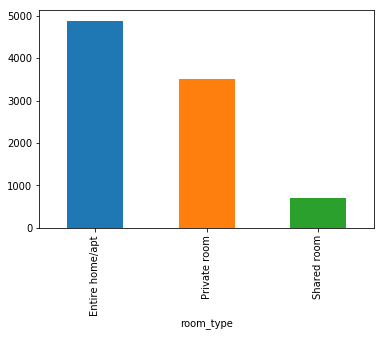

In [43]:
c = airbnb_taiwan.groupby(['room_type']).id.count()
c.plot.bar()

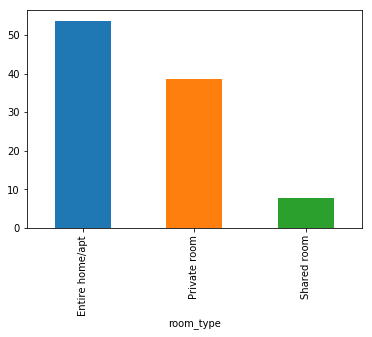

In [44]:
c = airbnb_taiwan.groupby(['room_type']).id.count().rename("count")
d = airbnb_taiwan.id.count()
(c / d * 100).plot.bar()

# Time series data

Time seies data refers to metrics that has a time dimensions, such as stocks data and weather. In this example, we will look at some random time-series data:

In [45]:
import numpy as np

In [46]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2016-01-01', periods=1000))

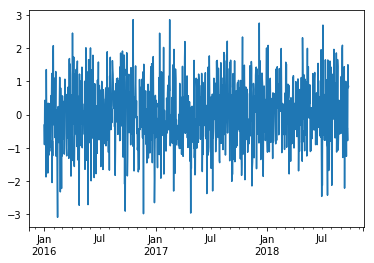

In [47]:
ts.plot()

In [48]:
ts = ts.cumsum()

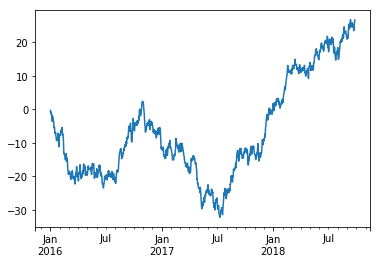

In [49]:
ts.plot()

# Datetime index filtering

In [50]:
ts.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24',
               '2018-09-25', '2018-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

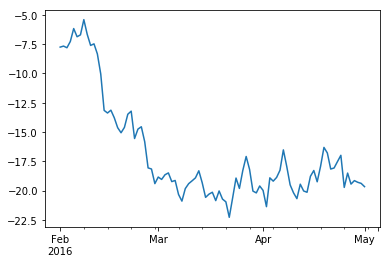

In [51]:
ts['2016-02-01':'2016-05-01'].plot()

# Summary
Pandas is a very helpful packages in data science, it helps you check and visualize data very quickly. This files contains only a very small portion of the pandas function. please read other materials for more informations.